<a href="https://colab.research.google.com/github/Veta-Ra-2/DR/blob/main/%D0%94%D0%B8%D0%BF%D0%BB%D0%BE%D0%BC%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключение диска

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Подключение TensorFlow и проверка версии

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Версия TensorFlow:", tf.__version__)

# Проверка доступных устройств GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU доступен:", gpus)
else:
    print("GPU недоступен для TensorFlow.")
print("Доступные устройства:", tf.config.list_physical_devices('GPU'))
gpus = tf.config.list_physical_devices('GPU')

Num GPUs Available:  0
Версия TensorFlow: 2.19.0
GPU недоступен для TensorFlow.
Доступные устройства: []


Определение наличия проекта в папке на гугл диске

In [3]:
import os
project_path = '/content/gdrive/MyDrive/Projects'
if not os.path.exists(project_path) or not os.listdir(project_path):
    print('Необходимо загрузить папку проекта на диск')
else:
    print('Папка найдена:', os.listdir(project_path))

Папка найдена: ['SP', 'uploaded_model.pkl', 'SP.zip']


In [4]:
!pip install jovian --upgrade --quiet

In [5]:
import jovian

In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [8]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
! kaggle competitions download student-demographics-online-education-dataoulad

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [10]:
%%capture
!pip install -r '/content/gdrive/MyDrive/Projects/SP/requirements.txt'

In [11]:
!pip install --upgrade scikit-learn scikeras

Импорт нужных библиотек


In [12]:
!python -m pip freeze

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.4
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.2.9.0.50.33
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.7
autograd==1.8.0
babel==2.18.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.33.0
bigquery-magics==0.12.0
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.2.0
blosc2==4.0.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==7.0.1
catalogue==2.0.10
certifi==2026.1.4
cff

Импорт необходимых библиотек

In [13]:
!pip install scikeras

In [14]:
import kagglehub
import zipfile
import os
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from typing import Tuple
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score, confusion_matrix



In [15]:
path_to_dataset = kagglehub.dataset_download("anlgrbz/student-demographics-online-education-dataoulad")
if path_to_dataset == '':
  print('проверить путь')
else:
  print("Загруженный датасет:", path_to_dataset)

Using Colab cache for faster access to the 'student-demographics-online-education-dataoulad' dataset.
Загруженный датасет: /kaggle/input/student-demographics-online-education-dataoulad


Распаковка архива, загруженного на диск

In [16]:
zip_path = '/content/gdrive/MyDrive/Projects/SP.zip'
extract_path = '/content/gdrive/MyDrive/Projects/'
req =  '/content/gdrive/MyDrive/Projects/requirements.txt'
zip_file_name = 'SP.zip'
folder_path = extract_path
zip_file_path_in_folder = os.path.join(folder_path, zip_file_name)

if os.path.exists(folder_path) and os.path.exists(req):
    print(f"Проектная папка '{os.path.basename(folder_path)}' и файл требований '{os.path.basename(req)}' существуют. Пропускаем распаковку.")
elif os.path.exists(zip_path):
    print(f"Файл '{zip_file_name}' найден по пути: {zip_path}. Начинаем распаковку.")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for member in zip_ref.namelist():
            if not os.path.exists(os.path.join(extract_path, member)):
                zip_ref.extract(member, extract_path)
                print(f"{member} был распакован")
            else:
                print(f"{member} уже существует")
else:
    print(f"Ошибка: zip-архив '{zip_file_name}' не найден по пути '{zip_path}'. Убедитесь, что он загружен.")
    print(f"ИЛИ: Проектная папка '{os.path.basename(folder_path)}' по пути '{folder_path}' не существует, или файл требований '{os.path.basename(req)}' по пути '{req}' не существует.")


Файл 'SP.zip' найден по пути: /content/gdrive/MyDrive/Projects/SP.zip. Начинаем распаковку.
SP/.idea/ уже существует
SP/.idea/.gitignore уже существует
SP/.idea/inspectionProfiles/ уже существует
SP/.idea/inspectionProfiles/profiles_settings.xml уже существует
SP/.idea/misc.xml уже существует
SP/.idea/modules.xml уже существует
SP/.idea/PR.iml уже существует
SP/.idea/workspace.xml уже существует
SP/app/ уже существует
SP/app/desktop/ уже существует
SP/app/web/ уже существует
SP/data/ уже существует
SP/data/external/ уже существует
SP/data/processed/ уже существует
SP/data/raw/ уже существует
SP/data/raw/assessments.csv уже существует
SP/data/raw/courses.csv уже существует
SP/data/raw/studentAssessment.csv уже существует
SP/data/raw/studentInfo.csv уже существует
SP/data/raw/studentRegistration.csv уже существует
SP/data/raw/studentVle.csv уже существует
SP/data/raw/vle.csv уже существует
SP/logs/ уже существует
SP/main.py уже существует
SP/models/ уже существует
SP/models/model_scripts

Проверка наличия данных и заагрузка

In [17]:
#Проверка и вывод файлов из датасета
if os.path.exists(path_to_dataset):
    files = os.listdir(path_to_dataset)

    if files:
        print("Найдены следующие файлы в директории:")
        for file in files:
            print(f"- {file}")

else:
    print(f"Директория '{path_to_dataset}' не существует")

Найдены следующие файлы в директории:
- studentRegistration.csv
- studentAssessment.csv
- studentInfo.csv
- studentVle.csv
- vle.csv
- assessments.csv
- courses.csv


In [18]:
student_info = pd.read_csv(f"{path_to_dataset}/studentInfo.csv", nrows=1000)
courses_info = pd.read_csv(f"{path_to_dataset}/courses.csv", nrows=1000)
student_assessment = pd.read_csv(f"{path_to_dataset}/studentAssessment.csv", nrows=1000)
student_vle = pd.read_csv(f"{path_to_dataset}/studentVle.csv", nrows=1000)
assessment = pd.read_csv(f"{path_to_dataset}/assessments.csv", nrows=1000)

In [19]:
student_info.head()
student_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           1000 non-null   object
 1   code_presentation     1000 non-null   object
 2   id_student            1000 non-null   int64 
 3   gender                1000 non-null   object
 4   region                1000 non-null   object
 5   highest_education     1000 non-null   object
 6   imd_band              975 non-null    object
 7   age_band              1000 non-null   object
 8   num_of_prev_attempts  1000 non-null   int64 
 9   studied_credits       1000 non-null   int64 
 10  disability            1000 non-null   object
 11  final_result          1000 non-null   object
dtypes: int64(3), object(9)
memory usage: 93.9+ KB


In [20]:
courses_info.head()
courses_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [21]:
student_assessment.head()
student_assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_assessment   1000 non-null   int64  
 1   id_student      1000 non-null   int64  
 2   date_submitted  1000 non-null   int64  
 3   is_banked       1000 non-null   int64  
 4   score           998 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [22]:
student_vle.head()
student_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   code_module        1000 non-null   object
 1   code_presentation  1000 non-null   object
 2   id_student         1000 non-null   int64 
 3   id_site            1000 non-null   int64 
 4   date               1000 non-null   int64 
 5   sum_click          1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [23]:
assessment.head()
assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [24]:
df_students_assessment = pd.merge(student_info, student_assessment, on="id_student", how="inner")
df_students_assessment.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754,115,0,80.0
3,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1752,22,0,70.0
4,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1753,52,0,68.0


In [25]:
df_courses = pd.merge(df_students_assessment, courses_info, on="code_module", how="inner")
df_courses.head()

,code_module,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score,code_presentation_y,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0,2013J,268
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0,2014J,269
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0,2013J,268
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0,2014J,269
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754,115,0,80.0,2013J,268


In [26]:
df = pd.merge(df_courses, student_vle, on="id_student", how="inner")
df.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_submitted,is_banked,score,code_presentation_y,module_presentation_length,code_module_y,code_presentation,id_site,date,sum_click
0,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,4
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,1
2,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,1
3,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546614,-10,11
4,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546714,-10,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module_x               5980 non-null   object 
 1   code_presentation_x         5980 non-null   object 
 2   id_student                  5980 non-null   int64  
 3   gender                      5980 non-null   object 
 4   region                      5980 non-null   object 
 5   highest_education           5980 non-null   object 
 6   imd_band                    5446 non-null   object 
 7   age_band                    5980 non-null   object 
 8   num_of_prev_attempts        5980 non-null   int64  
 9   studied_credits             5980 non-null   int64  
 10  disability                  5980 non-null   object 
 11  final_result                5980 non-null   object 
 12  id_assessment               5980 non-null   int64  
 13  date_submitted              5980 

In [28]:
print("Использованная память до оптимизации:")
df.info(memory_usage='deep')

Использованная память до оптимизации:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module_x               5980 non-null   object 
 1   code_presentation_x         5980 non-null   object 
 2   id_student                  5980 non-null   int64  
 3   gender                      5980 non-null   object 
 4   region                      5980 non-null   object 
 5   highest_education           5980 non-null   object 
 6   imd_band                    5446 non-null   object 
 7   age_band                    5980 non-null   object 
 8   num_of_prev_attempts        5980 non-null   int64  
 9   studied_credits             5980 non-null   int64  
 10  disability                  5980 non-null   object 
 11  final_result                5980 non-null   object 
 12  id_assessment               5980 non-null   int64  


In [29]:
def optimize_dataframe_memory(df):
    optimized_df = df.copy()
    for col in optimized_df.columns:
        col_type = optimized_df[col].dtype

        if str(col_type).startswith('int'):
            min_val = optimized_df[col].min()
            max_val = optimized_df[col].max()
            if min_val >= -128 and max_val <= 127: # int8
                optimized_df[col] = optimized_df[col].astype('int8')
            elif min_val >= -32768 and max_val <= 32767: # int16
                optimized_df[col] = optimized_df[col].astype('int16')
            elif min_val >= -2147483648 and max_val <= 2147483647: # int32
                optimized_df[col] = optimized_df[col].astype('int32')
        elif str(col_type).startswith('float'):
            optimized_df[col] = optimized_df[col].astype('float32')
        elif col_type == 'object':
            num_unique_values = len(optimized_df[col].unique())
            num_total_values = len(optimized_df[col])
            if num_unique_values / num_total_values < 0.5:
                optimized_df[col] = optimized_df[col].astype('category')
    return optimized_df

df_optimized = optimize_dataframe_memory(df)

print("\nОптимизировано:")
df_optimized.info(memory_usage='deep')

df = df_optimized.copy()



Оптимизировано:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   code_module_x               5980 non-null   category
 1   code_presentation_x         5980 non-null   category
 2   id_student                  5980 non-null   int32   
 3   gender                      5980 non-null   category
 4   region                      5980 non-null   category
 5   highest_education           5980 non-null   category
 6   imd_band                    5446 non-null   category
 7   age_band                    5980 non-null   category
 8   num_of_prev_attempts        5980 non-null   int8    
 9   studied_credits             5980 non-null   int16   
 10  disability                  5980 non-null   category
 11  final_result                5980 non-null   category
 12  id_assessment               5980 non-null   int16   
 13  d

In [30]:
df1 = df.copy(deep=True)
print('DataSet скопирован')

DataSet скопирован


In [31]:
print ('dataset: %s'%(str(df.shape)))

dataset: (5980, 23)


In [32]:
all_col=df.columns
all_col

Index(['code_module_x', 'code_presentation_x', 'id_student', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result',
       'id_assessment', 'date_submitted', 'is_banked', 'score',
       'code_presentation_y', 'module_presentation_length', 'code_module_y',
       'code_presentation', 'id_site', 'date', 'sum_click'],
      dtype='object')

In [33]:
cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index([], dtype='object')

In [34]:
num_col=df.select_dtypes(include=['int64','float64']).columns
num_col

Index([], dtype='object')

In [35]:
def check_missing_values(df):
#Проверяем, пустой ли DataFrame
  if df.empty or not isinstance(df, pd.DataFrame):
        print("Переданный DataFrame некорректный")
        return None

  m_val = df.isnull().sum()
  total_rows = len(df)
  m_per = (m_val / total_rows) * 100

  miss_sum = pd.DataFrame({
        'Missing Values': m_val,
        'Percentage (%)': m_per
    })
  #Проверка на пустые значения
  if m_val.sum() == 0:
        print("Пропущенные значения отсутствуют.")
        return None
  else:
        print("Пропущенные значения найдены:")
        result = miss_sum[miss_sum['Missing Values'] > 0]
        return result

In [36]:
missing_data = check_missing_values(df)

Пропущенные значения найдены:


In [37]:
def convert_to_numeric(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    label_encoders = {}
    for column in df.columns:
        if df[column].dtype == 'object':  # Если столбец категориальный/строковый
            unique_values = df[column].nunique()
            if unique_values < 20:  # Если категорий немного, применяем Label Encoding
                le = LabelEncoder()
                df[column] = le.fit_transform(df[column])
                label_encoders[column] = le
            else:
                # Для строковых данных с большим количеством уникальных значений - One-Hot Encoding
                df = pd.get_dummies(df, columns=[column], drop_first=True)

    return df


In [38]:
df['imd_band'].isnull().sum()

np.int64(534)

In [39]:
df['score'].isnull().sum()

np.int64(0)

In [40]:
df['imd_band'].head()

,imd_band
0,20-30%
1,20-30%
2,20-30%
3,20-30%
4,20-30%


In [41]:
imputer = SimpleImputer(strategy='most_frequent')

imd_band_values = df['imd_band']

# Пропущенные значения
missing_values_before = df['imd_band'].isnull().sum()
print(f"Пропущенные значения до заполнения: {missing_values_before}")

imd_band_values = df['imd_band'].values.reshape(-1, 1)

# Заполнение пропущенных значений
df['imd_band'] = imputer.fit_transform(imd_band_values).ravel()

# Количество пропущенных значений после заполнения
missing_values_after = df['imd_band'].isnull().sum()
print("Пропущенные значения после заполнения:", missing_values_after)

Пропущенные значения до заполнения: 534
Пропущенные значения после заполнения: 0


In [42]:
# Создаем экземпляр SimpleImputer с выбранной стратегией
imputer = SimpleImputer(strategy='mean')

# Проверяем, есть ли столбец 'score' в DataFrame
if 'score' not in df.columns:
    raise ValueError("Столбец 'score' отсутствует в DataFrame.")

# Преобразуем данные столбца 'ш' в массив NumPy
score_values = df['score'].values.reshape(-1, 1)

# Проверяем наличие пропущенных значений в столбце
missing_values_before = np.isnan(score_values).sum()
print(f"Пропущенные значения до заполнения: {missing_values_before}")

# Выполняем заполнение пропущенных значений
df['score'] = imputer.fit_transform(score_values)

# Проверяем количество пропущенных значений после заполнения
missing_values_after = df['score'].isnull().sum()
print(f"Пропущенные значения после заполнения: {missing_values_after}")

Пропущенные значения до заполнения: 0
Пропущенные значения после заполнения: 0


In [43]:
# Проходим по всем столбцам DataFrame
for column in df.columns:
    print(f"Обработка столбца: '{column}'")

    # Проверяем тип данных столбца
    column_dtype = df[column].dtype
    print(f"Тип данных: {column_dtype}")

    # Проверяем наличие пропущенных значений
    missing_values = df[column].isnull().sum()
    print(f"Количество пропущенных значений: {missing_values}")

    # Если столбец категориальный или содержит строки, выводим уникальные значения
    if column_dtype == 'object' or column_dtype.name == 'category':
        unique_values = df[column].nunique()
        print(f"Количество уникальных значений: {unique_values}")
        print("Примеры уникальных значений:")
        print(df[column].unique()[:5])  # Выводим первые 5 уникальных значений
    else:
        # Для числовых столбцов выводим основные статистики
        print("Основные статистические характеристики:")
        print(df[column].describe())

    # Выводим количество повторений каждого значения
    print("Количество повторений каждого значения:")
    print(df[column].value_counts(dropna=False))
    print("-" * 50)

Обработка столбца: 'code_module_x'
Тип данных: category
Количество пропущенных значений: 0
Количество уникальных значений: 1
Примеры уникальных значений:
['AAA']
Categories (1, object): ['AAA']
Количество повторений каждого значения:
code_module_x
AAA    5980
Name: count, dtype: int64
--------------------------------------------------
Обработка столбца: 'code_presentation_x'
Тип данных: category
Количество пропущенных значений: 0
Количество уникальных значений: 2
Примеры уникальных значений:
['2013J', '2014J']
Categories (2, object): ['2013J', '2014J']
Количество повторений каждого значения:
code_presentation_x
2013J    5692
2014J     288
Name: count, dtype: int64
--------------------------------------------------
Обработка столбца: 'id_student'
Тип данных: int32
Количество пропущенных значений: 0
Основные статистические характеристики:
count      5980.000000
mean     175029.557191
std       82451.194814
min       28400.000000
25%      104476.000000
50%      172797.000000
75%      2555

In [44]:
df.describe()

,id_student,num_of_prev_attempts,studied_credits,id_assessment,date_submitted,is_banked,score,module_presentation_length,id_site,date,sum_click
count,5980.000000,5980.000000,5980.000000,5980.000000,5980.000000,5980.0,5980.000000,5980.000000,5980.000000,5980.0,5980.000000
mean,175029.557191,0.048161,68.658863,1752.961538,62.870903,0.0,72.149498,268.500000,546761.693311,-10.0,5.158863
std,82451.194814,0.214123,36.118415,0.819681,40.735536,0.0,10.332403,0.500042,134.120918,0.0,7.186046
min,28400.000000,0.000000,60.000000,1752.000000,7.000000,0.0,30.000000,268.000000,546614.000000,-10.0,1.000000
25%,104476.000000,0.000000,60.000000,1752.000000,19.000000,0.0,65.000000,268.000000,546662.000000,-10.0,1.000000
50%,172797.000000,0.000000,60.000000,1753.000000,54.000000,0.0,74.000000,268.500000,546681.000000,-10.0,2.000000
75%,255548.000000,0.000000,60.000000,1754.000000,116.000000,0.0,80.000000,269.000000,546879.000000,-10.0,5.000000
max,312782.000000,1.000000,420.000000,1754.000000,131.000000,0.0,95.000000,269.000000,547050.000000,-10.0,62.000000


In [45]:
# Удаляем дубликаты из DataFrame
df = df.drop_duplicates()

# Проверяем DataFrame после удаления дубликатов
print("После удаления дубликатов:")
print(df)

# Удаляем строки с пропущенными значениями
df = df.dropna()

# Проверяем DataFrame после удаления пропущенных значений
print("После удаления пропусков:")
print(df)

После удаления дубликатов:
     code_module_x code_presentation_x  id_student gender            region  \
0              AAA               2013J       28400      F          Scotland   
1              AAA               2013J       28400      F          Scotland   
3              AAA               2013J       28400      F          Scotland   
4              AAA               2013J       28400      F          Scotland   
5              AAA               2013J       28400      F          Scotland   
...            ...                 ...         ...    ...               ...   
5975           AAA               2014J      235507      M  Yorkshire Region   
5976           AAA               2014J      235507      M  Yorkshire Region   
5977           AAA               2014J      235507      M  Yorkshire Region   
5978           AAA               2014J      235507      M  Yorkshire Region   
5979           AAA               2014J      235507      M  Yorkshire Region   

          highest_educat

In [46]:
atype = []
for a in df.age_band:
  if (a == '0-35'):
     atype.append('0')
  elif (a == '0-35'):
     atype.append('1')
  elif (a == '55<='):
     atype.append('2')
  else:
    atype.append('3')
df['age_band'] = atype

In [47]:
df2=df.copy(deep=True)

In [48]:
ftype = []
for f in df.final_result:
  if (f == 'Pass'):
     ftype.append(3)
  elif (f == 'Withdrawn'):
     ftype.append(2)
  elif (f == 'Distinction'):
     ftype.append(1)
  elif (f == 'Fail'):
     ftype.append(0)
  else:
    ftype.append(0)
df['final_result'] = ftype

In [49]:
df.head(20)

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_submitted,is_banked,score,code_presentation_y,module_presentation_length,code_module_y,code_presentation,id_site,date,sum_click
0,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,4
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,1
3,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546614,-10,11
4,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546714,-10,1
5,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,8
6,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546876,-10,2
7,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546688,-10,15
8,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546662,-10,17
9,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546890,-10,1
10,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,547011,-10,1


In [50]:
df.head(20)


,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_submitted,is_banked,score,code_presentation_y,module_presentation_length,code_module_y,code_presentation,id_site,date,sum_click
0,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,4
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,1
3,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546614,-10,11
4,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546714,-10,1
5,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546652,-10,8
6,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546876,-10,2
7,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546688,-10,15
8,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546662,-10,17
9,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,546890,-10,1
10,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,70.0,2013J,268,AAA,2013J,547011,-10,1


In [51]:
df.describe()

,id_student,num_of_prev_attempts,studied_credits,final_result,id_assessment,date_submitted,is_banked,score,module_presentation_length,id_site,date,sum_click
count,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.000000,5890.0,5890.000000,5890.000000,5890.000000,5890.0,5890.000000
mean,174776.848217,0.047878,68.699491,2.664516,1752.962309,62.934126,0.0,72.204414,268.500000,546762.964007,-10.0,5.200000
std,82270.896135,0.213526,36.336380,0.781111,0.819779,40.752629,0.0,10.345183,0.500042,134.184197,0.0,7.231589
min,28400.000000,0.000000,60.000000,0.000000,1752.000000,7.000000,0.0,30.000000,268.000000,546614.000000,-10.0,1.000000
25%,104476.000000,0.000000,60.000000,3.000000,1752.000000,19.000000,0.0,66.000000,268.000000,546662.000000,-10.0,1.000000
50%,172797.000000,0.000000,60.000000,3.000000,1753.000000,54.000000,0.0,74.000000,268.500000,546684.000000,-10.0,2.000000
75%,255548.000000,0.000000,60.000000,3.000000,1754.000000,116.000000,0.0,80.000000,269.000000,546879.000000,-10.0,5.000000
max,312782.000000,1.000000,420.000000,3.000000,1754.000000,131.000000,0.0,95.000000,269.000000,547050.000000,-10.0,62.000000


In [52]:
# Создаем экземпляр класса StandardScaler
scaler = StandardScaler()

# Извлекаем данные столбца 'score' и преобразуем их в нужный формат
score_values = df['score'].values.reshape(-1, 1)

# Применяем стандартизацию к данным
scaled_scores = scaler.fit_transform(score_values)

# Сохраняем стандартизированные данные обратно в DataFrame
df['score'] = scaled_scores

# Печатаем описание нового стандартизированного столбца
print("Описание стандартизированного столбца 'score':")
print(df['score'].describe())

Описание стандартизированного столбца 'score':
count    5.890000e+03
mean    -2.072501e-08
std      1.000092e+00
min     -4.079978e+00
25%     -5.997920e-01
50%      1.735825e-01
75%      7.536134e-01
max      2.203691e+00
Name: score, dtype: float64


In [53]:
df.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_submitted,is_banked,score,code_presentation_y,module_presentation_length,code_module_y,code_presentation,id_site,date,sum_click
0,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,-0.213105,2013J,268,AAA,2013J,546652,-10,4
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,-0.213105,2013J,268,AAA,2013J,546652,-10,1
3,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,-0.213105,2013J,268,AAA,2013J,546614,-10,11
4,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,-0.213105,2013J,268,AAA,2013J,546714,-10,1
5,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,3,0,60,...,22,0,-0.213105,2013J,268,AAA,2013J,546652,-10,8


In [54]:
#добавление категорий в датафрейм
encoder = LabelEncoder()
df['imd_band'] = encoder.fit_transform(df['imd_band'])
df.head()

,code_module_x,code_presentation_x,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,date_submitted,is_banked,score,code_presentation_y,module_presentation_length,code_module_y,code_presentation,id_site,date,sum_click
0,AAA,2013J,28400,F,Scotland,HE Qualification,2,3,0,60,...,22,0,-0.213105,2013J,268,AAA,2013J,546652,-10,4
1,AAA,2013J,28400,F,Scotland,HE Qualification,2,3,0,60,...,22,0,-0.213105,2013J,268,AAA,2013J,546652,-10,1
3,AAA,2013J,28400,F,Scotland,HE Qualification,2,3,0,60,...,22,0,-0.213105,2013J,268,AAA,2013J,546614,-10,11
4,AAA,2013J,28400,F,Scotland,HE Qualification,2,3,0,60,...,22,0,-0.213105,2013J,268,AAA,2013J,546714,-10,1
5,AAA,2013J,28400,F,Scotland,HE Qualification,2,3,0,60,...,22,0,-0.213105,2013J,268,AAA,2013J,546652,-10,8


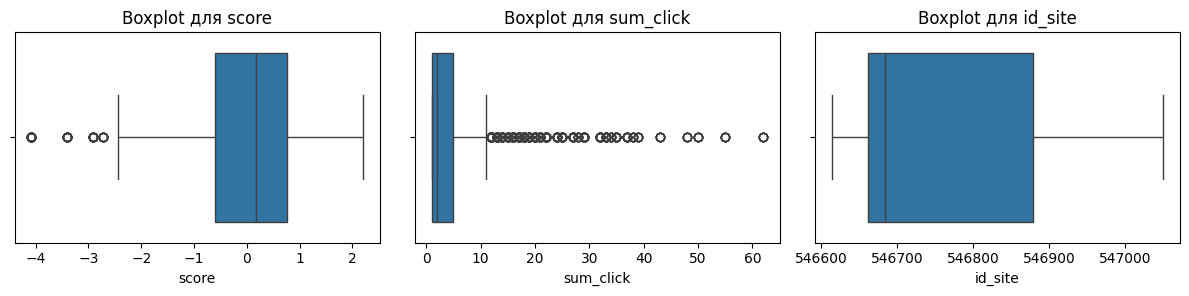

In [55]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df[['score', 'sum_click', 'id_site']]): # Removed 'module_presentation_length'
    plt.subplot(3, 3, i+1)  # Печатаем графики по 3 в ряду
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot для {column}')
    plt.tight_layout()
plt.show()

In [56]:
def detect_outliers_iqr(df: pd.DataFrame, numerical_columns: list) -> pd.DataFrame:
    outliers_list = []

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

#Границы выброса
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

#Подсчет выброса
        outlier_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])

#Вывод списка с выбросом
        outliers_list.append({
            "column": column,
            "lower_bound": lower_bound,
            "upper_bound": upper_bound,
            "outlier_count": outlier_count
        })

    return pd.DataFrame(outliers_list)

#выборка числовых столбцов
numerical_columns = df.select_dtypes(include=[np.number]).columns

outliers_info = detect_outliers_iqr(df, numerical_columns)

print(outliers_info)

                        column  lower_bound    upper_bound  outlier_count
0                   id_student -122132.0000  482156.000000              0
1                     imd_band      -3.0000      13.000000              0
2         num_of_prev_attempts       0.0000       0.000000            282
3              studied_credits      60.0000      60.000000            588
4                 final_result       3.0000       3.000000           1080
5                id_assessment    1749.0000    1757.000000              0
6               date_submitted    -126.5000     261.500000              0
7                    is_banked       0.0000       0.000000              0
8                        score      -2.6299       2.783722             80
9   module_presentation_length     266.5000     270.500000              0
10                     id_site  546336.5000  547204.500000              0
11                        date     -10.0000     -10.000000              0
12                   sum_click      -5

In [57]:
numerical_columns = df.select_dtypes(include=[float, int]).columns
# Минимум-Максимум Нормализация
min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
df_min_max[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Результат
print("Нормализованные данные (Min-Max):")
print(df_min_max.head())
df=df_min_max

Нормализованные данные (Min-Max):
  code_module_x code_presentation_x  id_student gender    region  \
0           AAA               2013J         0.0      F  Scotland   
1           AAA               2013J         0.0      F  Scotland   
3           AAA               2013J         0.0      F  Scotland   
4           AAA               2013J         0.0      F  Scotland   
5           AAA               2013J         0.0      F  Scotland   

  highest_education  imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification  0.222222        3                     0               60   
1  HE Qualification  0.222222        3                     0               60   
3  HE Qualification  0.222222        3                     0               60   
4  HE Qualification  0.222222        3                     0               60   
5  HE Qualification  0.222222        3                     0               60   

   ... date_submitted  is_banked     score  code_presentation_y  \
0  

In [58]:
# Выводим уникальные значения для числовых столбцов
numerical_columns = df.select_dtypes(include=[float, int]).columns

for column in numerical_columns:
    unique_values = df[column].unique()
    print(f"Столбец: {column}")
    print(f"Количество уникальных чисел: {len(unique_values)}")
    print(f"Уникальные значения: {unique_values[:10]}")  # Первые 10 значений
    print("-" * 50)

Столбец: id_student
Количество уникальных чисел: 87
Уникальные значения: [0.         0.01126654 0.01577104 0.03394378 0.05999676 0.10234825
 0.10715516 0.10825228 0.11869598 0.12307389]
--------------------------------------------------
Столбец: imd_band
Количество уникальных чисел: 10
Уникальные значения: [0.22222222 0.55555556 0.88888889 0.33333333 0.77777778 0.66666667
 0.44444444 1.         0.         0.11111111]
--------------------------------------------------
Столбец: final_result
Количество уникальных чисел: 4
Уникальные значения: [1.         0.66666667 0.33333333 0.        ]
--------------------------------------------------
Столбец: score
Количество уникальных чисел: 49
Уникальные значения: [0.61538461 0.58461538 0.64615384 0.63076923 0.67692307 0.6
 0.         0.50769231 0.75384614 0.53846154]
--------------------------------------------------
Столбец: id_site
Количество уникальных чисел: 67
Уникальные значения: [0.08715596 0.         0.2293578  0.60091743 0.16972477 0.1100

In [59]:
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:

    # Удаление строк с пропущенными значениями
    df = df.dropna()

    # Пример создания нового признака
    if 'date_registration' in df.columns and 'date_unregistration' in df.columns:
        df['duration'] = pd.to_datetime(df['date_unregistration']) - pd.to_datetime(df['date_registration'])
        df['duration'] = df['duration'].dt.days

    # Преобразование категориальных признаков в числовые
    df = pd.get_dummies(df, drop_first=True)

    return df
preprocess_data(df)

,id_student,imd_band,num_of_prev_attempts,studied_credits,final_result,id_assessment,date_submitted,is_banked,score,module_presentation_length,...,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_Post Graduate Qualification,age_band_2,age_band_3,disability_Y,code_presentation_y_2014J
0,0.00000,0.222222,0,60,1.0,1752,22,0,0.615385,268,...,False,False,False,True,False,False,False,True,False,False
1,0.00000,0.222222,0,60,1.0,1752,22,0,0.615385,268,...,False,False,False,True,False,False,False,True,False,False
3,0.00000,0.222222,0,60,1.0,1752,22,0,0.615385,268,...,False,False,False,True,False,False,False,True,False,False
4,0.00000,0.222222,0,60,1.0,1752,22,0,0.615385,268,...,False,False,False,True,False,False,False,True,False,False
5,0.00000,0.222222,0,60,1.0,1752,22,0,0.615385,268,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0.72827,1.000000,1,180,1.0,1752,18,0,0.538462,268,...,False,False,True,False,False,False,False,False,False,False
5976,0.72827,1.000000,1,180,1.0,1752,18,0,0.538462,269,...,False,False,True,False,False,False,False,False,False,True
5977,0.72827,1.000000,1,180,1.0,1752,18,0,0.538462,269,...,False,False,True,False,False,False,False,False,False,True
5978,0.72827,1.000000,1,180,1.0,1752,18,0,0.538462,269,...,False,False,True,False,False,False,False,False,False,True


In [60]:
def convert_to_numeric(df: pd.DataFrame) -> pd.DataFrame:
    df1 = df.copy()
    label_encoders = {}
    for column in df1.columns:
        if df1[column].dtype == 'category':  # Если столбец категориальный/строковый
            unique_values = df1[column].nunique()
            if unique_values < 20:  # Если категорий немного, применяем Label Encoding
                le = LabelEncoder()
                df[column] = le.fit_transform(df1[column])
                label_encoders[column] = le
            else:
                # Для строковых данных с большим количеством уникальных значений - One-Hot Encoding
                df1 = pd.get_dummies(df1, columns=[column], drop_first=True)

    return df1

In [61]:
def check_missing_values(df):
    # Проверяем, передан ли DataFrame
    if not isinstance(df, pd.DataFrame):
        print("Ошибка: переданный объект не является DataFrame.")
        return None

    # Проверяем, пустой ли DataFrame
    if df.empty:
        print("Переданный DataFrame пустой.")
        return None

    # Вычисляем количество пропущенных значений
    missing_values_count = df.isnull().sum()

    # Вычисляем процент пропущенных значений
    total_rows = len(df)
    missing_percentage = (missing_values_count / total_rows) * 100

    # Создаем результирующий DataFrame
    missing_summary = pd.DataFrame({
        'Missing Values': missing_values_count,
        'Percentage (%)': missing_percentage
    })

    # Проверяем, есть ли вообще пропущенные значения
    if missing_values_count.sum() == 0:
        print("Пропущенные значения отсутствуют.")
    else:
        print("Пропущенные значения найдены. Подробности ниже:")
        print(missing_summary)

    # Возвращаем результирующий DataFrame
    return missing_summary
check_missing_values(df)

Пропущенные значения отсутствуют.


,Missing Values,Percentage (%)
code_module_x,0,0.0
code_presentation_x,0,0.0
id_student,0,0.0
gender,0,0.0
region,0,0.0
highest_education,0,0.0
imd_band,0,0.0
age_band,0,0.0
num_of_prev_attempts,0,0.0
studied_credits,0,0.0


In [62]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for column in cat_cols:
    print(f"Столбец: {column}")
    print(f"Количество уникальных чисел: {len(unique_values)}")
    print(f"Уникальные значения: {unique_values[:10]}")

Столбец: code_module_x
Количество уникальных чисел: 67
Уникальные значения: [0.08715596 0.         0.2293578  0.60091743 0.16972477 0.11009174
 0.63302752 0.91055046 0.91513761 0.58944954]
Столбец: code_presentation_x
Количество уникальных чисел: 67
Уникальные значения: [0.08715596 0.         0.2293578  0.60091743 0.16972477 0.11009174
 0.63302752 0.91055046 0.91513761 0.58944954]
Столбец: gender
Количество уникальных чисел: 67
Уникальные значения: [0.08715596 0.         0.2293578  0.60091743 0.16972477 0.11009174
 0.63302752 0.91055046 0.91513761 0.58944954]
Столбец: region
Количество уникальных чисел: 67
Уникальные значения: [0.08715596 0.         0.2293578  0.60091743 0.16972477 0.11009174
 0.63302752 0.91055046 0.91513761 0.58944954]
Столбец: highest_education
Количество уникальных чисел: 67
Уникальные значения: [0.08715596 0.         0.2293578  0.60091743 0.16972477 0.11009174
 0.63302752 0.91055046 0.91513761 0.58944954]
Столбец: age_band
Количество уникальных чисел: 67
Уникальны

In [63]:
convert_to_numeric(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 5979
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module_x               5890 non-null   int64  
 1   code_presentation_x         5890 non-null   int64  
 2   id_student                  5890 non-null   float64
 3   gender                      5890 non-null   int64  
 4   region                      5890 non-null   int64  
 5   highest_education           5890 non-null   int64  
 6   imd_band                    5890 non-null   float64
 7   age_band                    5890 non-null   object 
 8   num_of_prev_attempts        5890 non-null   int8   
 9   studied_credits             5890 non-null   int16  
 10  disability                  5890 non-null   int64  
 11  final_result                5890 non-null   float64
 12  id_assessment               5890 non-null   int16  
 13  date_submitted              5890 non-n

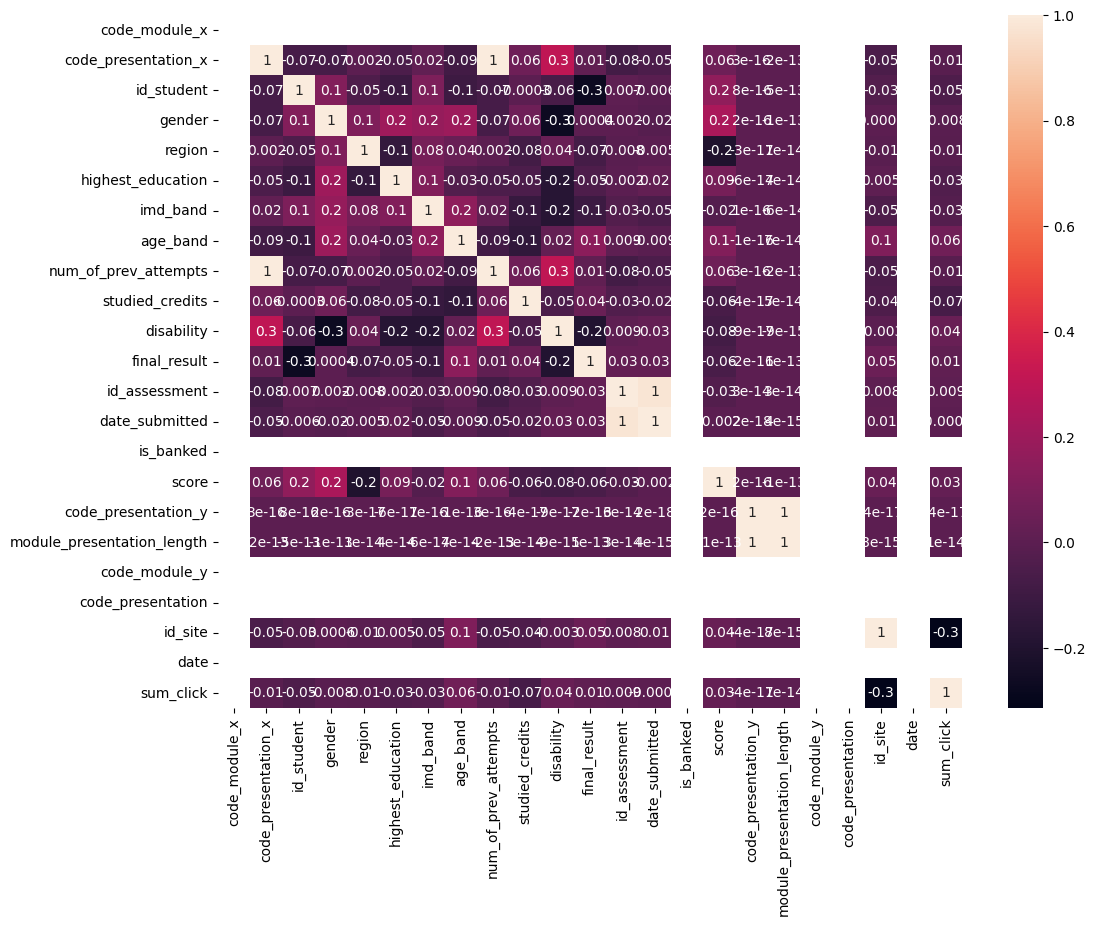

In [64]:
plt.figure(figsize=[12,9])
sns.heatmap(df.corr(),annot=True,fmt='.1g')
plt.show()

/tmp/ipython-input-3736645998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='final_result', palette='viridis')


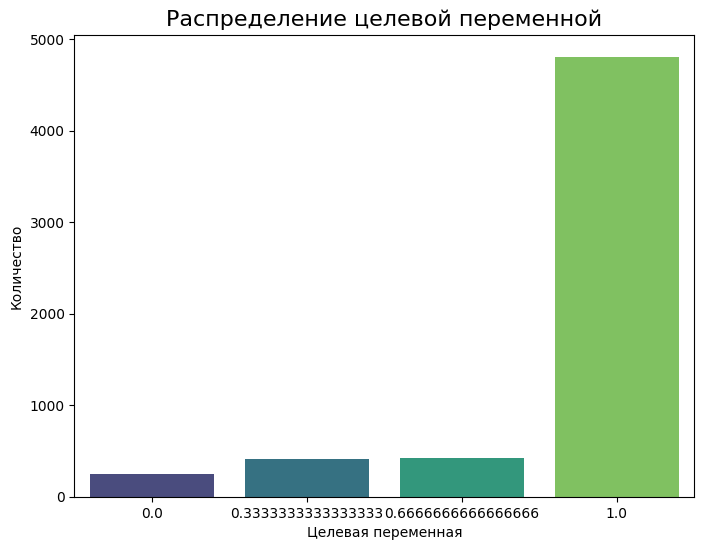

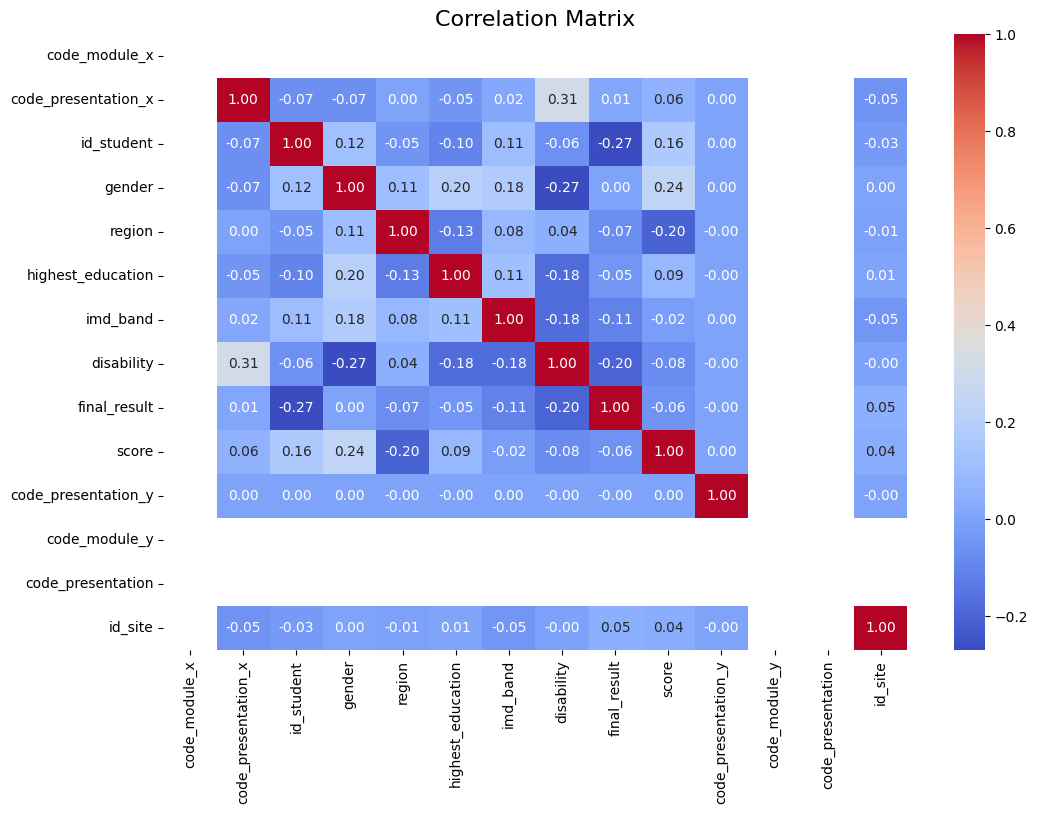

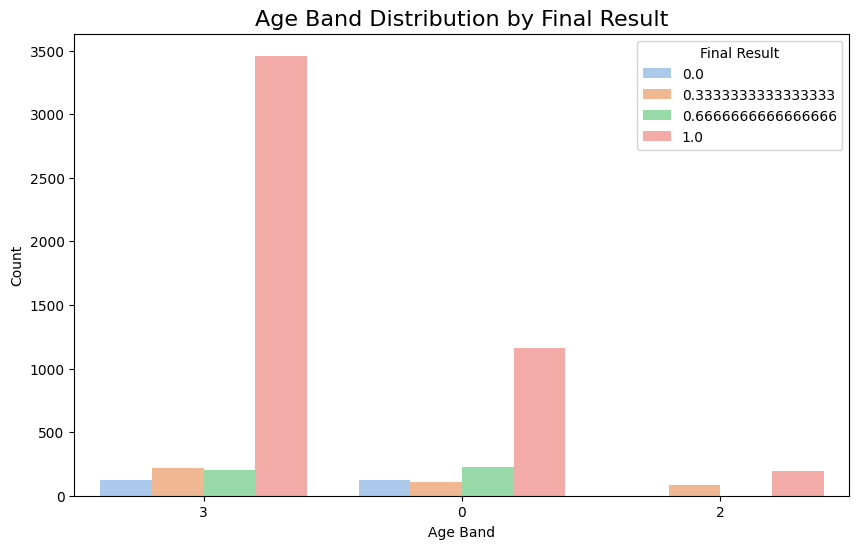

In [65]:
#Распределение целевой переменной (final_result)
data = df.copy()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='final_result', palette='viridis')
plt.title('Распределение целевой переменной', fontsize=16)
plt.xlabel('Целевая переменная')
plt.ylabel('Количество')
plt.show()

#Корреляционная матрица для числовых признаков
numerical_data = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
arr_matrix = numerical_data.corr()
sns.heatmap(arr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

#Распределение возраста студентов (age_band) по результатам
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_band', hue='final_result', palette='pastel')
plt.title('Age Band Distribution by Final Result', fontsize=16)
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.legend(title='Final Result')
plt.show()

Классификация студентов


In [66]:
model = RandomForestClassifier(n_estimators=150, max_depth=20)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 5979
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module_x               5890 non-null   int64  
 1   code_presentation_x         5890 non-null   int64  
 2   id_student                  5890 non-null   float64
 3   gender                      5890 non-null   int64  
 4   region                      5890 non-null   int64  
 5   highest_education           5890 non-null   int64  
 6   imd_band                    5890 non-null   float64
 7   age_band                    5890 non-null   object 
 8   num_of_prev_attempts        5890 non-null   int8   
 9   studied_credits             5890 non-null   int16  
 10  disability                  5890 non-null   int64  
 11  final_result                5890 non-null   float64
 12  id_assessment               5890 non-null   int16  
 13  date_submitted              5890 non-n

In [68]:
df['final_result'] = df['final_result'].astype(int)

In [69]:
df2=df.copy(deep=True)

In [70]:
#обучение модели
model.fit(df[df.columns[df.columns!='final_result']], df.final_result)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",150
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [71]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'final_result'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

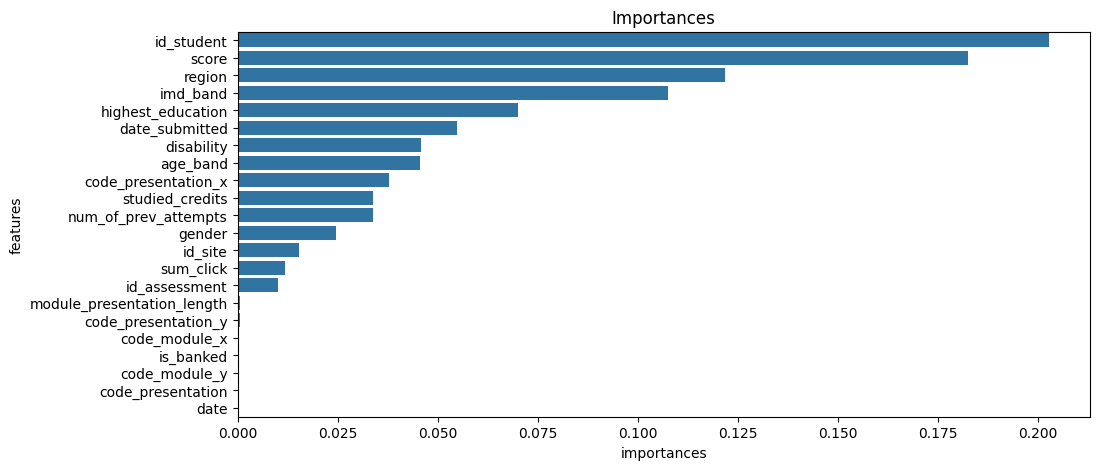

In [72]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances')
plt.show()

In [73]:
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), axis=1)

In [74]:
df.columns

Index(['id_student', 'region', 'highest_education', 'imd_band', 'age_band',
       'disability', 'final_result', 'date_submitted', 'score'],
      dtype='object')

In [75]:
df = df.drop('id_student', axis=1)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score
import pickle

In [77]:
#Создание списка моделей
classs=[
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    GaussianNB(),
    LogisticRegression(),
    RandomForestClassifier(),
]

In [78]:
log_col=["Classs","Acc"]
log=pd.DataFrame(columns=log_col)
x = df.drop('final_result', axis=1)
y = df['final_result']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
acc_dict={}

In [79]:
output_dir='/content/gdrive/MyDrive/Projects/SP/models/saved_models'

In [80]:
model_paths = [
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/KNeighborsClassifier.pkl',
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/LogisticRegression.pkl',
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/RandomForestClassifier.pkl',
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/GaussianNB.pkl',
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/SVC.pkl',
    '/content/gdrive/MyDrive/Projects/SP/models/saved_models/DecisionTreeClassifier.pkl'
]

In [81]:
metrics_dict = {}
for clf_instance in classs: # Renamed clf to clf_instance to avoid conflict
    name = clf_instance.__class__.__name__
    file_name = os.path.join(output_dir, f"{name}.pkl")

    # Always train and save the model with the current data
    print(f"Обучение и сохранение модели '{name}'...")
    clf_instance.fit(x_train, y_train)

    with open(file_name, 'wb') as file:
        pickle.dump(clf_instance, file)
    print(f"Модель '{name}' сохранена в файл: {file_name}")

    # After training and saving, use the newly trained model for prediction
    test_predictions = clf_instance.predict(x_test)

    # Determine unique labels for f1_score and confusion_matrix for robustness
    unique_labels = np.unique(y_test)
    if len(unique_labels) == 1:
        # If only one class in y_test, use 'binary' average for f1_score
        # and explicitly provide labels to confusion_matrix to avoid warnings
        f1 = f1_score(y_test, test_predictions, average='binary', pos_label=unique_labels[0])
        cm = confusion_matrix(y_test, test_predictions, labels=unique_labels)
    else:
        f1 = f1_score(y_test, test_predictions, average='weighted')
        cm = confusion_matrix(y_test, test_predictions, labels=unique_labels)

    accuracy = accuracy_score(y_test, test_predictions)

    metrics_dict[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': cm
    }

    print(f"Метрики для модели {name}:")
    print(f"  Точность: {accuracy:.4f}")
    print(f"  F1-меры: {f1:.4f}")
    print(f"  Матрица ошибок:\n{cm}\n")

Обучение и сохранение модели 'KNeighborsClassifier'...
Модель 'KNeighborsClassifier' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/KNeighborsClassifier.pkl
Метрики для модели KNeighborsClassifier:
  Точность: 0.9652
  F1-меры: 0.9660
  Матрица ошибок:
[[189   8]
 [ 33 948]]

Обучение и сохранение модели 'SVC'...
Модель 'SVC' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/SVC.pkl
Метрики для модели SVC:
  Точность: 0.8328
  F1-меры: 0.7568
  Матрица ошибок:
[[  0 197]
 [  0 981]]

Обучение и сохранение модели 'DecisionTreeClassifier'...
Модель 'DecisionTreeClassifier' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/DecisionTreeClassifier.pkl
Метрики для модели DecisionTreeClassifier:
  Точность: 0.9559
  F1-меры: 0.9572
  Матрица ошибок:
[[188   9]
 [ 43 938]]

Обучение и сохранение модели 'GaussianNB'...
Модель 'GaussianNB' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/GaussianN

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Модель 'LogisticRegression' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/LogisticRegression.pkl
Метрики для модели LogisticRegression:
  Точность: 0.8531
  F1-меры: 0.8289
  Матрица ошибок:
[[ 56 141]
 [ 32 949]]

Обучение и сохранение модели 'RandomForestClassifier'...
Модель 'RandomForestClassifier' сохранена в файл: /content/gdrive/MyDrive/Projects/SP/models/saved_models/RandomForestClassifier.pkl
Метрики для модели RandomForestClassifier:
  Точность: 0.9559
  F1-меры: 0.9568
  Матрица ошибок:
[[182  15]
 [ 37 944]]



In [82]:
metrics_dict={}
for model, name in zip(classs, model_paths):
    # Прогнозирование на тестовых данных
    test_predictions = model.predict(x_test)  # x_test - тестовые данные

    # Вычисление метрик
    accuracy = accuracy_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions, average='weighted')  # Используется среднее по всем классам
    cm = confusion_matrix(y_test, test_predictions)

    # Сохранение метрик в словарь
    metrics_dict[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': cm
    }

    # Вывод метрик
    print(f"Метрики для модели {name}:")
    print(f"  Точность: {accuracy:.4f}")
    print(f"  F1-меры: {f1:.4f}")
    print(f"  Матрица ошибок:\n{cm}\n")

Метрики для модели /content/gdrive/MyDrive/Projects/SP/models/saved_models/KNeighborsClassifier.pkl:
  Точность: 0.9652
  F1-меры: 0.9660
  Матрица ошибок:
[[189   8]
 [ 33 948]]

Метрики для модели /content/gdrive/MyDrive/Projects/SP/models/saved_models/LogisticRegression.pkl:
  Точность: 0.8328
  F1-меры: 0.7568
  Матрица ошибок:
[[  0 197]
 [  0 981]]

Метрики для модели /content/gdrive/MyDrive/Projects/SP/models/saved_models/RandomForestClassifier.pkl:
  Точность: 0.9559
  F1-меры: 0.9572
  Матрица ошибок:
[[188   9]
 [ 43 938]]

Метрики для модели /content/gdrive/MyDrive/Projects/SP/models/saved_models/GaussianNB.pkl:
  Точность: 0.8387
  F1-меры: 0.7939
  Матрица ошибок:
[[ 26 171]
 [ 19 962]]

Метрики для модели /content/gdrive/MyDrive/Projects/SP/models/saved_models/SVC.pkl:
  Точность: 0.8531
  F1-меры: 0.8289
  Матрица ошибок:
[[ 56 141]
 [ 32 949]]

Метрики для модели /content/gdrive/MyDrive/Projects/SP/models/saved_models/DecisionTreeClassifier.pkl:
  Точность: 0.9559
  F1-

In [83]:
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_col)
    log = pd.concat([log,log_entry], ignore_index = True)

Использование методов машинного обучения

<Figure size 1000x600 with 0 Axes>

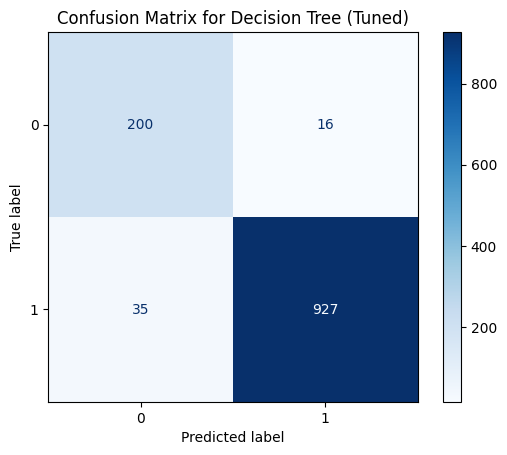

Модель 'Decision Tree (Tuned)' сохранена в файл: ./models/Decision Tree (Tuned).pkl
Classification Report for Decision Tree (Tuned):
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       216
           1       0.98      0.96      0.97       962

    accuracy                           0.96      1178
   macro avg       0.92      0.94      0.93      1178
weighted avg       0.96      0.96      0.96      1178



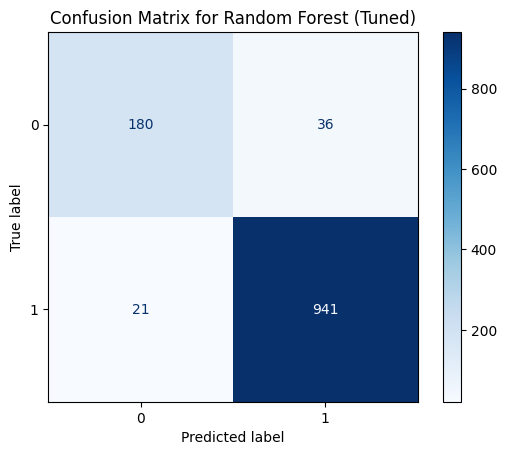

Модель 'Random Forest (Tuned)' сохранена в файл: ./models/Random Forest (Tuned).pkl
Classification Report for Random Forest (Tuned):
               precision    recall  f1-score   support

           0       0.90      0.83      0.86       216
           1       0.96      0.98      0.97       962

    accuracy                           0.95      1178
   macro avg       0.93      0.91      0.92      1178
weighted avg       0.95      0.95      0.95      1178



In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
# Разделение данных на обучающую и тестовую выборки (80% на 20%) с стратификацией
output_dir = './models'
os.makedirs(output_dir, exist_ok=True)
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define StratifiedKFold for GridSearchCV due to class imbalance
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42) # Changed n_splits to 2

# 1. Decision Tree с настройкой гиперпараметров
dt_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=skf) # Using skf
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# 2. Random Forest с настройкой гиперпараметров
rf_params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=skf) # Using skf
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Обучение и создание моделей для сравнения
models = {
    'Decision Tree (Tuned)': best_dt,
    'Random Forest (Tuned)': best_rf
}

# Настройка графика
plt.figure(figsize=(10, 6))

# Get all possible labels from the original dataset for consistent plotting
all_possible_labels = np.unique(y)

# Обучение и предсказания для каждой модели
for model_name, model_clf in models.items(): # Renamed model to model_clf
    model_clf.fit(X_train, y_train)  # Обучение модели
    y_pred = model_clf.predict(X_test)  # Прогнозирование на тестовых данных
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Already imported

    # Use all_possible_labels for display_labels
    cm = confusion_matrix(y_test, y_pred, labels=all_possible_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_possible_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Формирование имени файла для сохранения
    file_name = os.path.join(output_dir, f"{model_name}.pkl")
    # Сохранение модели
    with open(file_name, 'wb') as file:
        pickle.dump(model_clf, file)
    print(f"Модель '{model_name}' сохранена в файл: {file_name}")

    # 2. Classification Report
    from sklearn.metrics import classification_report # Already imported
    print(f'Classification Report for {model_name}:\n', classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       197
           1       0.99      0.96      0.97       981

    accuracy                           0.96      1178
   macro avg       0.91      0.95      0.92      1178
weighted avg       0.96      0.96      0.96      1178



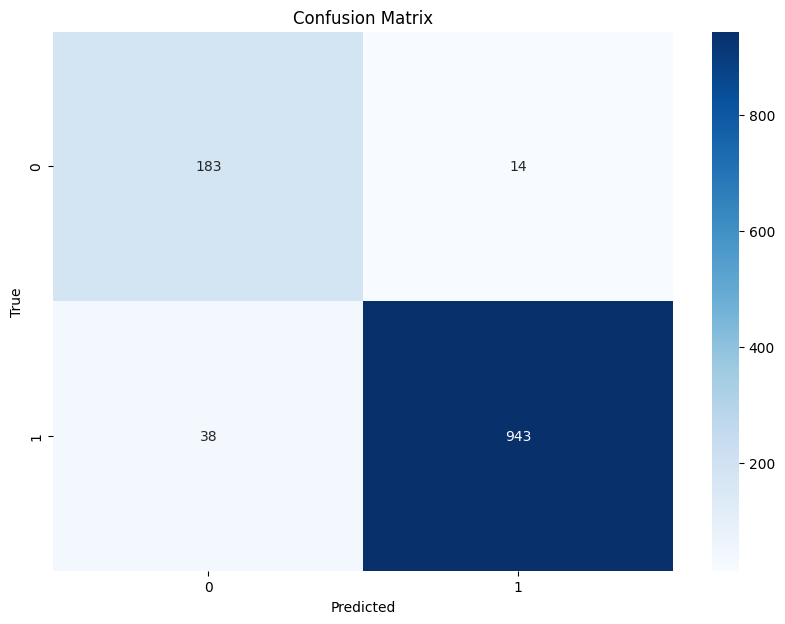

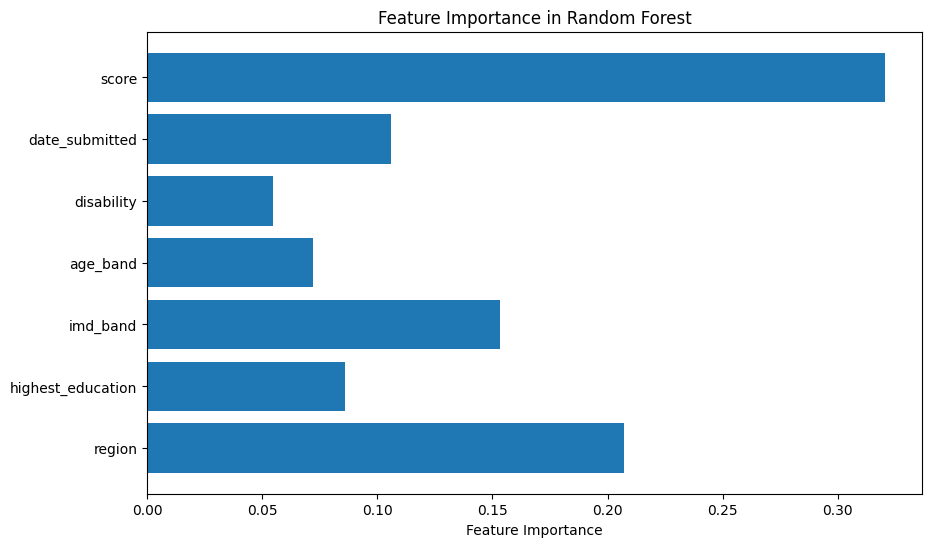

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       197
           1       0.98      0.97      0.98       981

    accuracy                           0.96      1178
   macro avg       0.92      0.94      0.93      1178
weighted avg       0.96      0.96      0.96      1178

Модель 'randomforestclassifier' сохранена в файл: ./models/Random Forest (Tuned).pkl


In [85]:
model_name = 'randomforestclassifier'
# Выбор признаков и целевой переменной
X = df.drop('final_result', axis=1)  # Убираем целевой столбец
y = df['final_result']  # Целевая переменная (итоговый результат)

# Преобразование категориальных признаков в числовые
label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)

# Разделение на обучающие и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Оценка модели
y_pred = rf.predict(X_test)

# Печать классификационного отчета
print(classification_report(y_test, y_pred))

# Визуализация confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Важность признаков
feature_importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)
print("Best Model Classification Report:")
print(classification_report(y_test, y_pred_best))
with open(file_name, 'wb') as file:
    pickle.dump(model, file)
print(f"Модель '{model_name}' сохранена в файл: {file_name}")

In [86]:
model_path = '/content/gdrive/MyDrive/Projects/SP/models/saved_models/Random Forest (Tuned).pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

test_predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, test_predictions)

# Вывод точности
print(f"Точность модели: {accuracy:.4f}")

Точность модели: 0.8328


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:463: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Нейронная сеть

In [87]:
def traintest_f (data, target, model, split=0, scale='linear', **params):
    le = preprocessing.LabelEncoder()
    target_col = le.fit_transform(target)


    # convert integers to dummy variables (i.e. one hot encoded)
    target_col = to_categorical(target_label).astype(float)

    # define 0.01 - 0.1, 0.1 - 0.9, 0.91 - 0.99 sample if split array not defined
    if (split == 0):
        split = np.concatenate((np.linspace(0.01,0.09,9), np.linspace(0.1,0.9,9), np.linspace(0.91,0.99,9)), axis=None)

    print("Parameters")
    print(params)

    print("Split sample:")
    print(split)

    train_scores = []
    test_scores = []

    for s in split:

        print("Running with test size of: %0.2f" % s)

        # get train/test for this split
        d = model_selection.train_test_split(data, target_label,
                                             test_size=s, random_state=0)

        # get training and test data and targets
        train_data, test_data, train_target, test_target = d

        # Data needs to be scaled to a small range like 0 to 1 for the neural network to work well.
        scaler = MinMaxScaler(feature_range=(0, 1))

        # Scale both the training inputs and outputs
        train_data = scaler.fit_transform(train_data)
        test_data = scaler.transform(test_data)

        # Train the model
        model.fit(
            train_data,
            train_target,
            **params,
            validation_data=(test_data, test_target)
        )

        train_error_rate = model.evaluate(train_data, train_target, verbose=0)
        test_error_rate = model.evaluate(test_data, test_target, verbose=0)

        # get test scores for fit and prediction
        train_scores.append(train_error_rate[1])
        test_scores.append(test_error_rate[1])

    # plot results
    plt.figure(figsize=(15.0, 5.0))
    if (scale == 'log'):
        plt.yscale('log')
    else:
        plt.yscale('linear')
    plt.plot(split, train_scores, label='Training accuracy', marker='o')
    plt.plot(split, test_scores, label='Testing accuracy', marker='o')
    plt.title('Training and Testing Accuracy')
    plt.xlabel('Test sample proportion')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(0, 1.0, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlim([min(split),max(split)])
    plt.ylim([0,1.01])
    plt.grid()
    plt.legend()

    return

In [88]:
def evaluate_model_accuracy(model, data, target_label_1d, **params):
    print("k-Fold Cross Validation")
    print("Parameters")
    print(params)

    kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True)
    cvscores = []
    for train, test in kfold.split(data, target_label_1d):
        target_label = to_categorical(target_label_1d).astype(float)

        scaler = MinMaxScaler(feature_range=(0, 1))

        # Scale both the training inputs and outputs
        data[train] = scaler.fit_transform(data[train])
        data[test] = scaler.fit_transform(data[test])

        model.fit(data[train], target_label[train], epochs=100, verbose=0)

        scores = model.evaluate(data[test], target_label[test], verbose=0)
        print('{0:} : {1:0.2f}%'.format(model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)
    print('Model Accuracy : {0:0.2f}% (+/- {1:0.2f}%)'.format(np.mean(cvscores), np.std(cvscores)))

    return np.mean(cvscores)

In [89]:
features_all = df.columns.tolist() # Update features_all to reflect current df columns
# Based on df.columns: ['region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result', 'date_submitted', 'score']
# Assuming you want to keep region, age_band, and score for the neural network input
features_sm = [features_all.index('region'), features_all.index('age_band'), features_all.index('score')]
features = []
for i in features_sm:
    features.append(features_all[i])
features

['region', 'age_band', 'score']

In [90]:
print(features_sm)
print(df.columns)

[0, 3, 7]
Index(['region', 'highest_education', 'imd_band', 'age_band', 'disability',
       'final_result', 'date_submitted', 'score'],
      dtype='object')


In [91]:
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing

In [92]:
print(df.columns.tolist())


['region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result', 'date_submitted', 'score']


In [93]:
data = df.loc[:, features].astype(float).values
target= df.loc[:, 'final_result'].values

le = preprocessing.LabelEncoder()
target_label_1d = le.fit_transform(target)

data.shape, target.shape, np.unique(target)

((5890, 3), (5890,), array([0, 1]))

In [94]:
def featuresplot(data, target, features, bclass):
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(features):
        plt.subplot(1, len(features) , i+1)
        plt.hist(data[target == bclass, i], bins=50, color='green', alpha=0.5, label='Pass')
        plt.hist(data[target != bclass, i], bins=50, color='red', alpha=0.5, label='Fail')
        plt.title(col)
        plt.legend()
        plt.tight_layout()
    plt.show()
bclass = 0

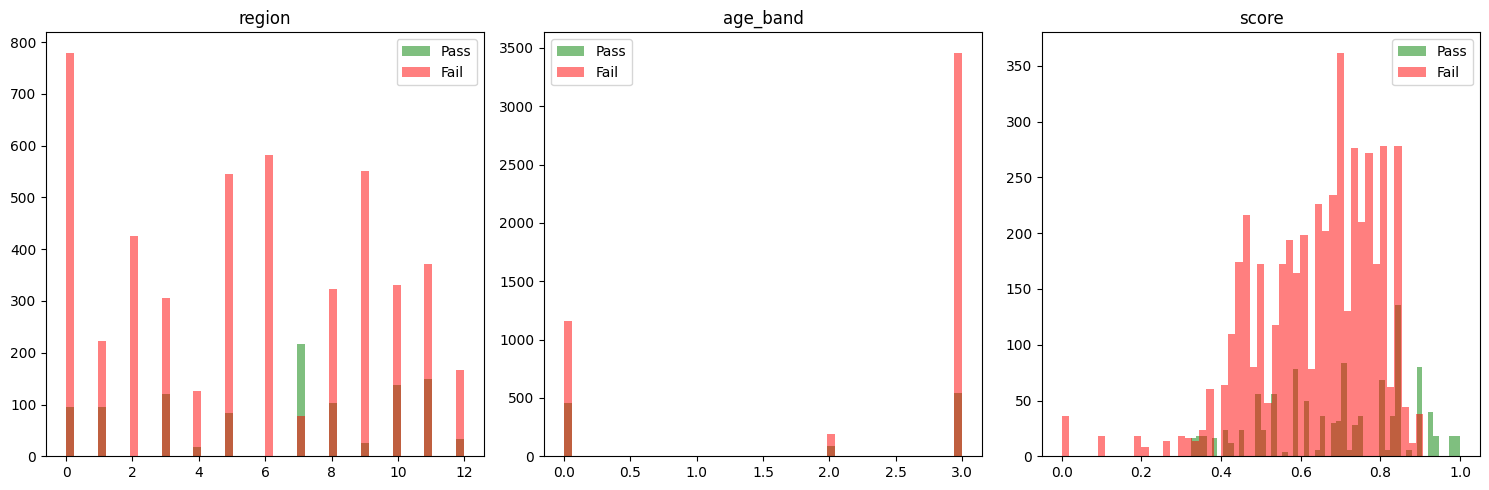

In [95]:
featuresplot(data, target, features, bclass)

In [96]:
from sklearn import model_selection

In [97]:
target_label = to_categorical(target_label_1d).astype(float)

In [98]:
d = model_selection.train_test_split(
    data, target_label, test_size=0.2, random_state=0)
train_data, test_data, train_target, test_target = d
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(4712, 3) (4712, 2) (1178, 3) (1178, 2)


In [99]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [100]:
def baseline_model():
    model = Sequential()
    model.add(Dense(350, kernel_initializer='uniform', input_dim=train_data.shape[1], activation='relu'))
    model.add(Dense(train_target.shape[1], kernel_initializer='uniform', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model
model = baseline_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
features = [features_all[i] for i in features_sm if i < len(features_all)]
print("Выбранные колонки:", features)

data = df[features].astype(float).values

Выбранные колонки: ['region', 'age_band', 'score']


In [102]:
RUN_NAME = 'run 6 epoch 800 nodes 350 relu,3 relu, adam'
# Create a TensorBoard logger
logger = keras.callbacks.TensorBoard(
    log_dir='/content/gdrive/MyDrive/Projects/SP/logs{}'.format(RUN_NAME),
    histogram_freq=5,
    write_graph=True)

In [103]:
model.fit(
    train_data,
    train_target,
    epochs=50,
    shuffle=True,
    verbose=1,
    callbacks=[logger],
    validation_data=(test_data, test_target)
)

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7919 - loss: 0.5394 - val_accuracy: 0.8132 - val_loss: 0.4779
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8186 - loss: 0.4622 - val_accuracy: 0.8132 - val_loss: 0.4747
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8277 - loss: 0.4349 - val_accuracy: 0.8132 - val_loss: 0.4563
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8217 - loss: 0.4367 - val_accuracy: 0.8260 - val_loss: 0.4486
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8255 - loss: 0.4296 - val_accuracy: 0.8132 - val_loss: 0.4431
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8301 - loss: 0.4167 - val_accuracy: 0.8260 - val_loss: 0.4370
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8324 - loss: 0.4141 - val_accuracy: 0.8260 - val_loss: 0.4345
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8276 - loss: 0.4185 - val_accuracy: 0.

In [104]:
save_dir = '/content/gdrive/MyDrive/Projects/SP/models/saved_models'
os.makedirs(save_dir, exist_ok=True)

# Сохранение модели
model.save(os.path.join(save_dir, 'model1.h5'))

In [105]:
test_error_rate = model.evaluate(test_data, test_target, verbose=1)
print("The categorical cross-entropy (CCE) for the test data set is: {0:0.4f}".format(test_error_rate[0]))
print("The accuracy of the test data set evaluation is: {0:0.2f}%".format(test_error_rate[1]*100))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8334 - loss: 0.3670
The categorical cross-entropy (CCE) for the test data set is: 0.3637
The accuracy of the test data set evaluation is: 84.30%


In [106]:
model_acc = evaluate_model_accuracy(model, data, target_label_1d, epochs=10, shuffle=True, verbose=1)

k-Fold Cross Validation
Parameters
{'epochs': 10, 'shuffle': True, 'verbose': 1}
compile_metrics : 89.47%
compile_metrics : 89.47%
compile_metrics : 91.85%
compile_metrics : 92.02%
compile_metrics : 91.17%
compile_metrics : 90.66%
compile_metrics : 87.95%
compile_metrics : 91.85%
compile_metrics : 91.85%
compile_metrics : 92.87%
Model Accuracy : 90.92% (+/- 1.44%)


In [107]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # Создаем директорию, если она не существует

# Укажите имя файла для сохранения модели
model_filename = "model2.h5"

# Полный путь к файлу
save_path = os.path.join(save_dir, model_filename)

# Сохранение модели
model.save(save_path)
print(f'Модель сохранена на дискскск {save_path}.')

Модель сохранена на дискскск /content/gdrive/MyDrive/Projects/SP/models/saved_models/model2.h5.


In [108]:
X = df.drop("final_result", axis=1)  # Признаки
y = df["final_result"]               # Целевая переменная

# Разделение данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

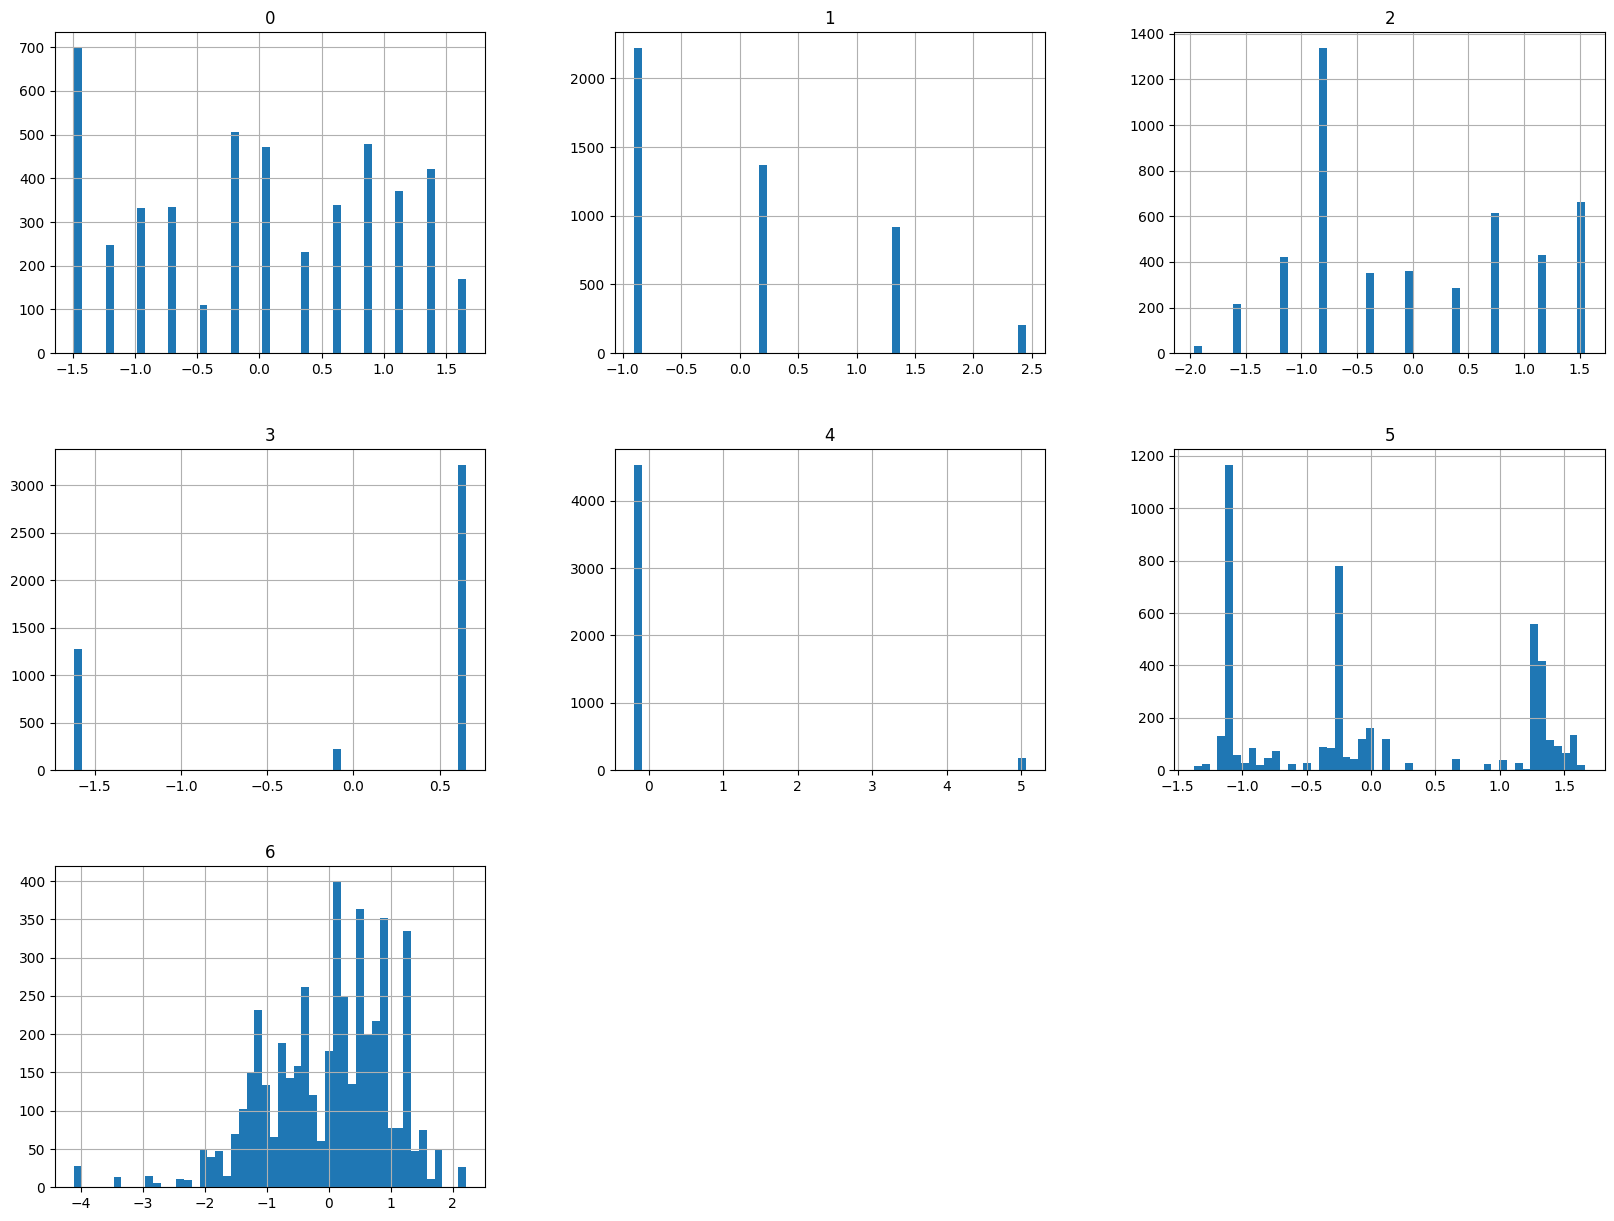

In [109]:
df = pd.DataFrame(X_train)  # Если данные в формате NumPy
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [110]:
corr_matrix = df.corr()
print(corr_matrix)


          0         1         2         3         4         5         6
0  1.000000 -0.141793  0.069100  0.034138  0.045886 -0.005782 -0.210249
1 -0.141793  1.000000  0.113605 -0.031186 -0.178442  0.017419  0.090578
2  0.069100  0.113605  1.000000  0.160246 -0.176701 -0.060792 -0.021716
3  0.034138 -0.031186  0.160246  1.000000  0.012180 -0.003443  0.116864
4  0.045886 -0.178442 -0.176701  0.012180  1.000000  0.030778 -0.085236
5 -0.005782  0.017419 -0.060792 -0.003443  0.030778  1.000000  0.005489
6 -0.210249  0.090578 -0.021716  0.116864 -0.085236  0.005489  1.000000


In [111]:
df = df.drop(df.columns[6],axis=1)

In [112]:
imp = SimpleImputer(strategy='mean')
df1['score'] = imp.fit_transform(df1['score'].values.reshape(-1, 1))
df1['score'].isnull().sum()

imp = SimpleImputer(strategy="most_frequent")
df1['imd_band'] = imp.fit_transform(df1['imd_band'].values.reshape(-1, 1)).ravel()
df1['imd_band'].isnull().sum()

df1 = df1.drop_duplicates().dropna()

In [113]:
df1.columns

Index(['code_module_x', 'code_presentation_x', 'id_student', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result',
       'id_assessment', 'date_submitted', 'is_banked', 'score',
       'code_presentation_y', 'module_presentation_length', 'code_module_y',
       'code_presentation', 'id_site', 'date', 'sum_click'],
      dtype='object')

In [114]:
df1=convert_to_numeric(df1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
df1['score'] = sc_X.fit_transform(df1['score'].values.reshape(-1, 1))
df1['score'].describe()


from sklearn.preprocessing import LabelEncoder
#добавление категорий в датафрейм
encoder = LabelEncoder()
df1['imd_band'] = encoder.fit_transform(df1['imd_band'])

# Пример: нормализация числовых столбцов
numerical_columns = df1.select_dtypes(include=[float, int]).columns

# 1. Минимум-Максимум Нормализация
min_max_scaler = MinMaxScaler()
df1_min_max = df1.copy()
df1_min_max[numerical_columns] = min_max_scaler.fit_transform(df1[numerical_columns])

# Результат
print("Нормализованные данные (Min-Max):")
print(df1_min_max.head())

df1=df1.drop(['code_module_y', 'code_presentation','code_module_x','code_presentation_x','code_presentation_y'], axis=1)

df1=df1.drop(['is_banked', 'date','id_site','module_presentation_length','sum_click'], axis=1)

Нормализованные данные (Min-Max):
  code_module_x code_presentation_x  id_student gender    region  \
0           AAA               2013J         0.0      F  Scotland   
1           AAA               2013J         0.0      F  Scotland   
3           AAA               2013J         0.0      F  Scotland   
4           AAA               2013J         0.0      F  Scotland   
5           AAA               2013J         0.0      F  Scotland   

  highest_education  imd_band age_band  num_of_prev_attempts  studied_credits  \
0  HE Qualification  0.222222    35-55                     0               60   
1  HE Qualification  0.222222    35-55                     0               60   
3  HE Qualification  0.222222    35-55                     0               60   
4  HE Qualification  0.222222    35-55                     0               60   
5  HE Qualification  0.222222    35-55                     0               60   

   ... date_submitted is_banked     score  code_presentation_y  \
0  .

In [115]:
df1.columns

Index(['id_student', 'gender', 'region', 'highest_education', 'imd_band',
       'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability',
       'final_result', 'id_assessment', 'date_submitted', 'score'],
      dtype='object')

In [116]:
f1type = []
for f in df1.final_result:
  if (f == 'Pass'):
     f1type.append('1')
  elif (f == 'Withdrawn'):
     f1type.append('1')
  elif (f == 'Distinction'):
     f1type.append('0')
  elif (f == 'Fail'):
     f1type.append('0')
  else:
    f1type.append('0')
df1['final_result'] = f1type

In [117]:
features_all1 = ['id_student', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'final_result',
       'id_assessment', 'date_submitted', 'score']
features_sm1 = [1, 3, 4, 6, 10]
features1 = []
for i in features_sm1:
    features1.append(features_all1[i])
features1

['region', 'imd_band', 'age_band', 'studied_credits', 'score']

In [118]:
features1 = [features_all1[i] for i in features_sm1]
subset_df = df1[features1].copy()

le_internal = LabelEncoder()
for col in subset_df.columns:
    if subset_df[col].dtype == 'object' or subset_df[col].dtype.name == 'category':
        subset_df[col] = le_internal.fit_transform(subset_df[col].astype(str))

data1 = subset_df.astype(float).values
target1 = df1.loc[:, 'final_result'].values

le = LabelEncoder()
target_label_1d1 = le.fit_transform(target1.astype(str))

print(data1.shape, target_label_1d1.shape)

(5890, 5) (5890,)


In [119]:
target_label1 = to_categorical(target_label_1d1).astype(float)

In [120]:
d1 = model_selection.train_test_split(
    data1, target_label1, test_size=0.2, random_state=0)

train_data1, test_data1, train_target1, test_target1 = d1

print(train_data1.shape, train_target1.shape, test_data1.shape, test_target1.shape)

(4712, 5) (4712, 2) (1178, 5) (1178, 2)


In [121]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_data1 = scaler.fit_transform(train_data1)
test_data1 = scaler.transform(test_data1)

In [122]:
def baseline_model():
    model = Sequential()
    model.add(Dense(300, activation='relu', input_dim=5))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model1 = baseline_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
RUN_NAME = 'run 6 epoch 800 nodes 350 relu,3 relu, adam'

logger = keras.callbacks.TensorBoard(
    log_dir='/Projects/SP/logs/{}'.format(RUN_NAME),
    histogram_freq=5,
    write_graph=True)

In [124]:
test_error_rate = model1.evaluate(test_data1, test_target1, verbose=1)
print("The categorical cross-entropy (CCE) for the test data set is: {0:0.4f}".format(test_error_rate[0]))
print("The accuracy of the test data set evaluation is: {0:0.2f}%".format(test_error_rate[1]*100))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8911 - loss: 0.6213
The categorical cross-entropy (CCE) for the test data set is: 0.6204
The accuracy of the test data set evaluation is: 89.30%


In [125]:
model_acc1 = evaluate_model_accuracy(model1, data1, target_label_1d1, epochs=5, shuffle=True, verbose=0)

k-Fold Cross Validation
Parameters
{'epochs': 5, 'shuffle': True, 'verbose': 0}
compile_metrics : 98.81%
compile_metrics : 98.81%
compile_metrics : 98.98%
compile_metrics : 99.15%
compile_metrics : 98.47%
compile_metrics : 96.94%
compile_metrics : 98.13%
compile_metrics : 98.98%
compile_metrics : 97.11%
compile_metrics : 98.81%
Model Accuracy : 98.42% (+/- 0.75%)


In [126]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # Создаем директорию, если она не существует

# Укажите имя файла для сохранения модели
model_filename = "model3.h5"

# Полный путь к файлу
save_path = os.path.join(save_dir, model_filename)

# Сохранение модели
model.save(save_path)
print(f'Модель сохранена на диск {save_path}.')

Модель сохранена на диск /content/gdrive/MyDrive/Projects/SP/models/saved_models/model3.h5.


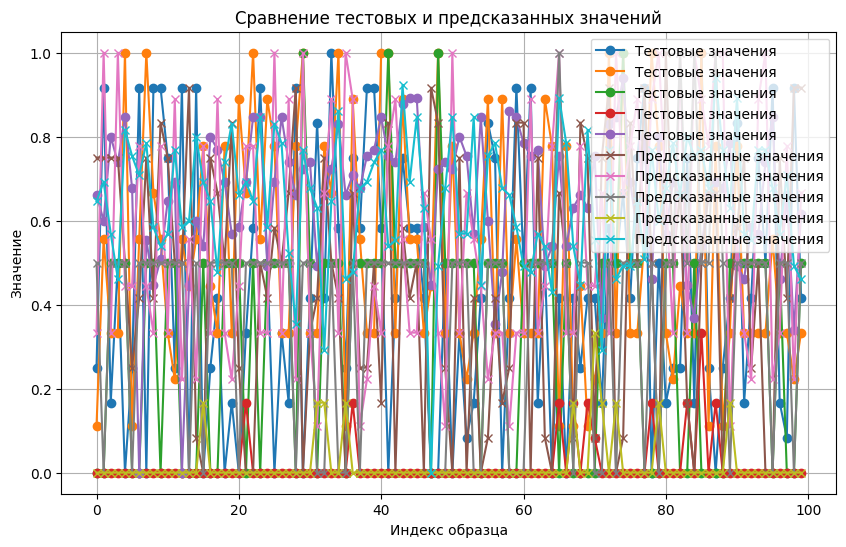

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(test_data1[:100], label='Тестовые значения', marker='o')
plt.plot(train_data1[:100], label='Предсказанные значения', marker='x')
plt.title('Сравнение тестовых и предсказанных значений')
plt.xlabel('Индекс образца')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

In [128]:
train_target1 = to_categorical(train_target1, num_classes=4)
test_target1 = to_categorical(test_target1, num_classes=4)

print(train_target1.shape)
print(test_target1.shape)

(4712, 2, 4)
(1178, 2, 4)


In [129]:
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np

def improved_model(input_shape):
    model = Sequential()

    # ИСПРАВЛЕНО: Добавлен model.add и input_shape
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.02), input_dim=input_shape))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())

    model.add(Dense(64, kernel_initializer='uniform', activation='relu', kernel_regularizer=l2(0.02)))
    model.add(Dropout(0.3))

    # Выходной слой на 4 класса
    model.add(Dense(4, kernel_initializer='uniform', activation='softmax'))

    # ИСПРАВЛЕНО: categorical_crossentropy для многоклассовой задачи
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

    return model

# ПОДГОТОВКА ДАННЫХ: Исправляем форму таргета (убираем лишнюю размерность)
# Если таргет (1178, 2, 4), мы берем его в виде (1178, 4)
if len(train_target1.shape) == 3:
    train_target1 = train_target1[:, 0, :]
    test_target1 = test_target1[:, 0, :]

# Создание модели с учетом количества колонок (их 4)
model = improved_model(train_data1.shape[1])

# Обучение
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_data1,
    train_target1,
    epochs=50,
    batch_size=32,
    shuffle=True,
    verbose=1,
    validation_data=(test_data1, test_target1),
    callbacks=[early_stopping]
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8007 - loss: 1.3016 - val_accuracy: 0.8930 - val_loss: 1.0762
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8928 - loss: 0.5182 - val_accuracy: 0.8930 - val_loss: 0.6958
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8873 - loss: 0.4261 - val_accuracy: 0.8930 - val_loss: 0.4565
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8893 - loss: 0.3653 - val_accuracy: 0.8930 - val_loss: 0.3430
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8950 - loss: 0.3303 - val_accuracy: 0.8930 - val_loss: 0.3011
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9047 - loss: 0.3060 - val_accuracy: 0.9355 - val_loss: 0.2662
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9206 - loss: 0.2815 - val_accuracy: 0.9100 - val_loss: 0.2559
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9213 - loss: 0.2696 - val_accuracy: 0.9126 - val_

In [130]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # Создаем директорию, если она не существует

# Укажите имя файла для сохранения модели
model_filename = "model4.h5"

# Полный путь к файлу
save_path = os.path.join(save_dir, model_filename)

# Сохранение модели
model.save(save_path)
print(f'Модель сохранена на диск {save_path}.')

Модель сохранена на диск /content/gdrive/MyDrive/Projects/SP/models/saved_models/model4.h5.


In [131]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense, Input

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


tf.get_logger().setLevel('ERROR')



def create_model(neurons=10):
    model = Sequential()
    model.add(Input(shape=(data1.shape[1],)))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


model = KerasClassifier(model=create_model, verbose=0)


param_grid = {'model__neurons': [5, 10, 20, 50, 100]}


grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', error_score='raise')


grid_result = grid.fit(data1, target_label_1d1)

# Результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.889287 using {'model__neurons': 5}


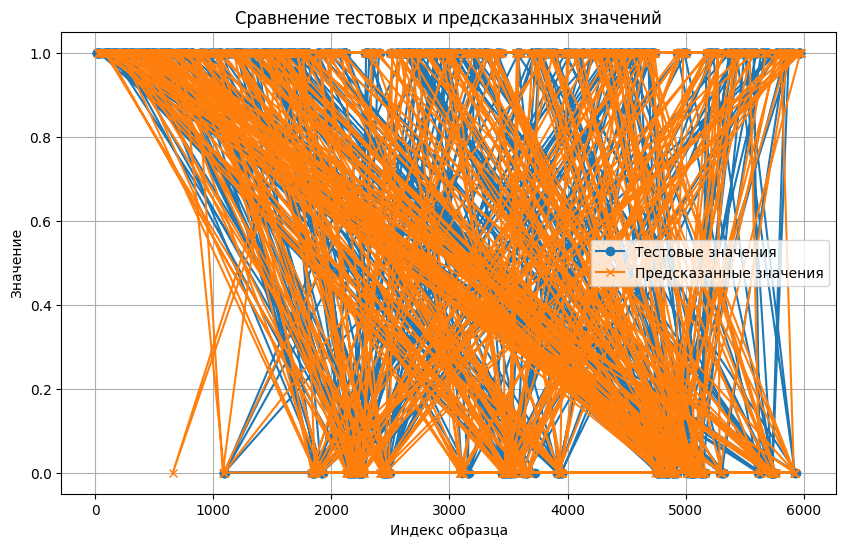

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(y_test[:1000], label='Тестовые значения', marker='o')
plt.plot(y_train[:1000], label='Предсказанные значения', marker='x')
plt.title('Сравнение тестовых и предсказанных значений')
plt.xlabel('Индекс образца')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

In [133]:
def improved_model(input_shape):
    model = Sequential()

    # 1. Добавляем Input слой, чтобы модель знала размерность данных (например, 7)
    model.add(Input(shape=(input_shape,)))

    # 2. Теперь можно добавлять нормализацию и дропаут
    model.add(BatchNormalization())


    model.add(Dense(350, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='elu'))
    model.add(Dropout(0.2))


    model.add(Dense(2, activation='softmax'))


    model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.0005),
        metrics=['accuracy']
    )
    return model
save_dir = '/content/gdrive/MyDrive/Projects/SP/models/saved_models'
os.makedirs(save_dir, exist_ok=True)

# Перед созданием модели определим размер входа
input_dim = train_data.shape[1] # Это возьмет количество колонок (7) автоматически
new_keras_model = improved_model(input_dim)

new_keras_model.fit(train_data, train_target, epochs=50, validation_split=0.2, verbose=1)

# Сохранение новой Keras модели
new_keras_model.save(os.path.join(save_dir, 'model5.keras'))
#Загрузка модели

y_pred = np.argmax(new_keras_model.predict(test_data), axis=1)
y_true = np.argmax(test_target, axis=1)

test_loss, test_accuracy = new_keras_model.evaluate(test_data, test_target)
print(f'Test Accuracy: {test_accuracy}')


Epoch 1/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7954 - loss: 0.4929 - val_accuracy: 0.8070 - val_loss: 0.4525
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8387 - loss: 0.4075 - val_accuracy: 0.8303 - val_loss: 0.4223
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8316 - loss: 0.4133 - val_accuracy: 0.8303 - val_loss: 0.4087
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8426 - loss: 0.3941 - val_accuracy: 0.8271 - val_loss: 0.4026
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8421 - loss: 0.3931 - val_accuracy: 0.8356 - val_loss: 0.3902
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8444 - loss: 0.3861 - val_accuracy: 0.8568 - val_loss: 0.3890
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8429 - loss: 0.3887 - val_accuracy: 0.8409 - val_loss: 0.3804
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8442 - loss: 0.3876 - val_accuracy: 0

In [134]:
y_probs = new_keras_model.predict(test_data[:5])
print("Новые вероятности (уверенность модели):")
print(y_probs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Новые вероятности (уверенность модели):
[[0.13731445 0.86268556]
 [0.48526657 0.51473343]
 [0.00355355 0.99644643]
 [0.0964122  0.90358776]
 [0.00197712 0.9980229 ]]


In [135]:
def improved_model():
    model = Sequential()

    model.add(Input(shape=(train_data.shape[1],)))

    model.add(Dropout(0.3))  # Dropout для предотвращения переобучения
    model.add(BatchNormalization())  # Нормализация для ускорения сходимости

    # Второй скрытый слой
    model.add(Dense(350, kernel_initializer='uniform', activation='relu', kernel_regularizer=l2(0.02)))
    model.add(Dropout(0.3))  # Dropout
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

    model.add(Dense(2, kernel_initializer='uniform', activation='softmax'))

    # Компиляция модели с оптимизатором Adam
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

    return model

# Создание модели
model = improved_model()

# Применение ранней остановки
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Обучение модели
model_imp = model.fit(
    train_data,
    train_target,
    epochs=50,
    batch_size=32,
    validation_data=(test_data, test_target),
    callbacks=[lr_scheduler, early_stopping]
)
save_dir = '/content/gdrive/MyDrive/Projects/SP/models/saved_models'
os.makedirs(save_dir, exist_ok=True)

# Сохранение модели
model.save(os.path.join(save_dir, 'model6.h5'))

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7788 - loss: 1.3652 - val_accuracy: 0.8132 - val_loss: 0.6310 - learning_rate: 5.0000e-04
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8165 - loss: 0.5670 - val_accuracy: 0.8132 - val_loss: 0.4931 - learning_rate: 5.0000e-04
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8231 - loss: 0.4784 - val_accuracy: 0.8132 - val_loss: 0.4789 - learning_rate: 5.0000e-04
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8227 - loss: 0.4670 - val_accuracy: 0.8132 - val_loss: 0.4778 - learning_rate: 5.0000e-04
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8167 - loss: 0.4757 - val_accuracy: 0.8132 - val_loss: 0.4772 - learning_rate: 5.0000e-04
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8183 - loss: 0.4718 - val_accuracy: 0.8132 - val_loss: 0.4767 - learning_rate: 5.0000e-04
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 

In [136]:
test_loss, test_accuracy = model.evaluate(test_data, test_target)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8061 - loss: 0.4857
Test Loss: 0.4761, Test Accuracy: 0.8132


In [137]:
from tensorflow.keras.models import load_model
import numpy as np
#Загрузка модели
model = load_model('/content/gdrive/MyDrive/Projects/SP/models/saved_models/model6.h5')

y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5).astype(int)

test_loss, test_accuracy = model.evaluate(test_data, test_target)
print(f'Test Accuracy: {test_accuracy}')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8061 - loss: 0.4857
Test Accuracy: 0.8132427930831909


In [138]:
import numpy as np
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

tf.get_logger().setLevel('ERROR')


# Функция для создания модели
def create_model(neurons=10):
    model = Sequential()
    model.add(Dense(neurons, input_dim=5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compiled = True
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=0)

param_grid = {'model__neurons': [5, 10, 20, 50, 100]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', error_score='raise')

grid_result = grid.fit(data1, target_label_1d1)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best: 0.889287 using {'model__neurons': 5}


In [139]:
features = [features_all[i] for i in features_sm]
data = df2.loc[:, features].astype(float).values
target = df2.loc[:, 'final_result'].values

le = preprocessing.LabelEncoder()
target_label_1d = le.fit_transform(target)

data.shape, target.shape, np.unique(target)

((5890, 3), (5890,), array([0, 1]))

In [140]:
d2 = model_selection.train_test_split(
    data, target_label, test_size=0.2, random_state=0)
train_data, test_data, train_target, test_target = d2
print(train_data.shape, train_target.shape, test_data.shape, test_target.shape)

(4712, 3) (4712, 2) (1178, 3) (1178, 2)


In [141]:
def create_binary_model(input_dim):
    model = Sequential()
    model.add(Dense(350, input_dim=input_dim, activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_dim = X_train.shape[1]  # Get the number of features from X_train
model = create_binary_model(input_dim)
model.fit(X_train, y_train, epochs=50, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7763 - loss: 0.5461
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8299 - loss: 0.3627
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8587 - loss: 0.3078
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8810 - loss: 0.2664
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8990 - loss: 0.2422
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9111 - loss: 0.2094
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9325 - loss: 0.1871
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9235 - loss: 0.1814
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9336 - loss: 0.1623
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9379 - loss: 0.1623
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9367 - loss: 0.1524
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [142]:
save_dir = '/content/gdrive/MyDrive/Projects/SP/models/saved_models'
os.makedirs(save_dir, exist_ok=True)

# Сохранение модели
model.save(os.path.join(save_dir, 'model7.h5'))

In [143]:
import os
from tensorflow.keras.models import load_model # Ensure load_model is imported

model_path = '/content/gdrive/MyDrive/Projects/SP/models/saved_models/model7.h5'

# Check if the model file exists before attempting to load
if os.path.exists(model_path):
    print(f"Loading model from: {model_path}")
    model = load_model(model_path)

    # Ensure X_test and y_test are consistent with how the model was trained
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)

    test_loss, test_accuracy = model.evaluate(X_test, y_test) # Use X_test and y_test for evaluation
    print(f'Test Accuracy: {test_accuracy}') # Print test_accuracy from the evaluation
else:
    print(f"Error: Model file not found at {model_path}. Please ensure it was saved correctly.")

Loading model from: /content/gdrive/MyDrive/Projects/SP/models/saved_models/model7.h5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9521 - loss: 0.1083
Test Accuracy: 0.9473684430122375
